In [12]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import seaborn.objects as so

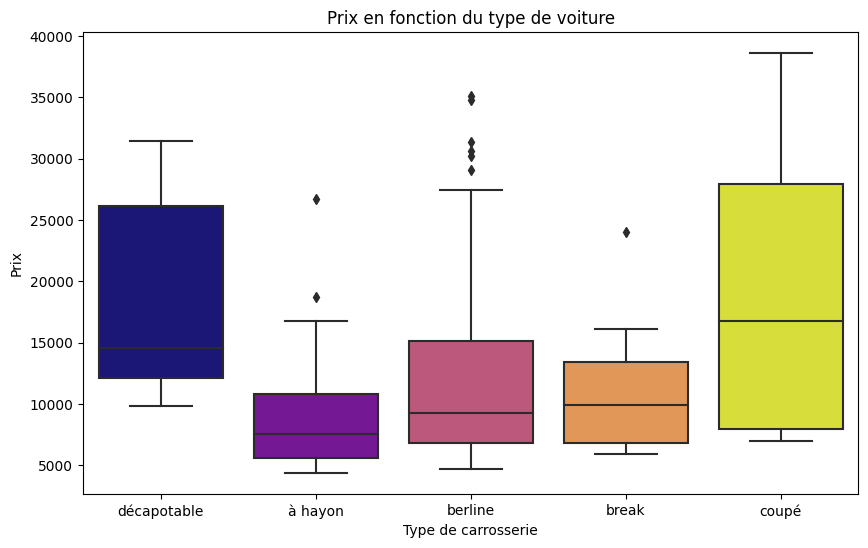

In [13]:
# Charger les données du fichier CSV
data = pd.read_csv("tableau_voitures.csv")

# Filtrer les colonnes pertinentes
data_filtered = data[['type_carrosserie', 'prix']]

# Tracer un graphique montrant le prix en fonction du type de voiture
plt.figure(figsize=(10, 6))

# Utiliser le colormap "plasma"
num_types = len(data_filtered['type_carrosserie'].unique())
cmap = plt.get_cmap('plasma', num_types)
colors = [cmap(i) for i in range(num_types)]

sns.boxplot(x='type_carrosserie', y='prix', data=data_filtered, palette=colors)
plt.title("Prix en fonction du type de voiture")
plt.xlabel("Type de carrosserie")
plt.ylabel("Prix")

# Afficher le graphique
plt.show()


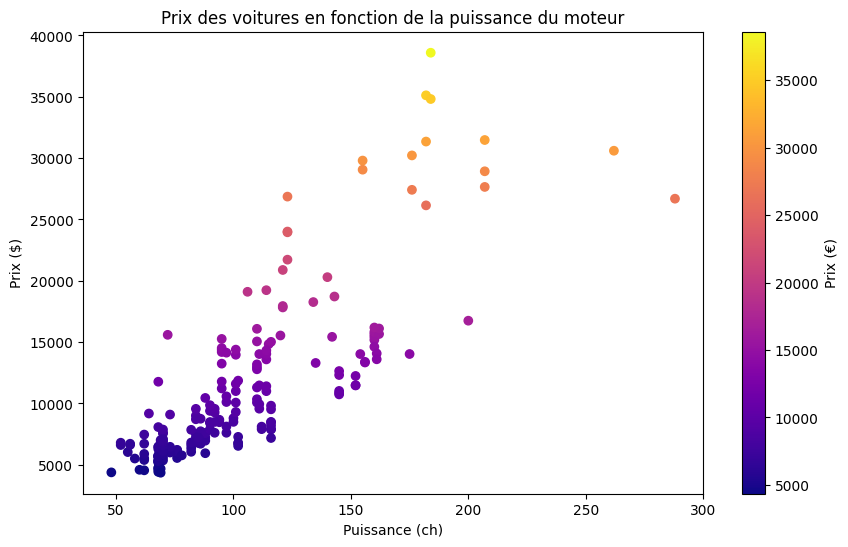

In [14]:
# Charger les données
df = pd.read_csv("tableau_voitures.csv")

# Créer le scatterplot
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('plasma')  # Utiliser le colormap "plasma"
points = plt.scatter(data=df, x='puissance', y='prix', c='prix', cmap=cmap)

# Personnaliser le graphique
plt.title("Prix des voitures en fonction de la puissance du moteur")
plt.xlabel("Puissance (ch)")
plt.ylabel("Prix ($)")
plt.colorbar(points, label="Prix (€)")  # Ajouter une légende de couleur pour le colormap

# Afficher le graphique
plt.show()
